# Clustering by K Means
[Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality) 

Input variables (based on physicochemical tests): 

| Attribute | Description |
| :---      | :---        |
| fixed acidity | |
| volatile acidity  | |
| citric acid  | |
| esidual sugar  | |
| chlorides  | |
| free sulfur dioxide  | |
| total sulfur dioxide  | |
| density  | |
| pH  | |
| sulphates  | |
| alcohol  | |
| quality | Output variable (based on sensory data), (score between 0 and 10) |

### Problem

### Notes

### References

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

%matplotlib inline

In [7]:
data = pd.read_csv('./data/winequality-red.csv',sep=';')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

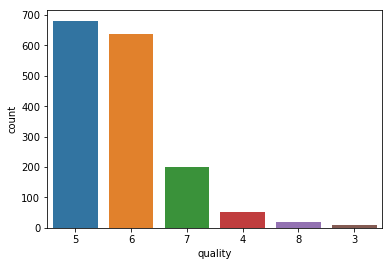

In [14]:
sns.countplot(data.quality,order=data['quality'].value_counts().index)

In [16]:
kmeans = KMeans(n_clusters=10)

In [17]:
kmeans.fit(data[data.columns[:-1]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
kmeans.cluster_centers_

array([[  7.73839286e+00,   6.08437500e-01,   2.41428571e-01,
          2.73035714e+00,   8.74375000e-02,   1.92767857e+01,
          8.78839286e+01,   9.96870536e-01,   3.34017857e+00,
          6.28928571e-01,   1.00910714e+01],
       [  8.40710227e+00,   5.19872159e-01,   2.52017045e-01,
          2.29090909e+00,   8.13579545e-02,   1.10568182e+01,
          2.67556818e+01,   9.96719517e-01,   3.31775568e+00,
          6.61647727e-01,   1.04862689e+01],
       [  8.04615385e+00,   5.75192308e-01,   3.17115385e-01,
          3.28076923e+00,   9.36346154e-02,   3.38365385e+01,
          1.38673077e+02,   9.97157692e-01,   3.23634615e+00,
          7.30000000e-01,   9.80576923e+00],
       [  7.92816901e+00,   5.01971831e-01,   2.41971831e-01,
          2.35211268e+00,   7.58591549e-02,   2.81267606e+01,
          4.94718310e+01,   9.96279437e-01,   3.36338028e+00,
          6.96267606e-01,   1.06010563e+01],
       [  7.90000000e+00,   3.00000000e-01,   6.80000000e-01,
          8.30